In [ ]:
 # connect google drive
from google.colab import drive
drive.mount('/content/drive')




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
from PIL import Image
import shutil


##환경설정

In [ ]:
!pip -q install git+https://github.com/open-mmlab/mim.git
!mim install mmaction2 -f https://github.com/open-mmlab/mmaction2.git
%cd /content/drive/MyDrive/RA/mmaction2
!pip -q install moviepy mmdet mmpose
!pip install -e .
# Install some optional requirements
!pip install -r requirements/optional.txt

!pip install imageio==2.4.1


# clone the MMTracking repository
# !git clone https://github.com/open-mmlab/mmtracking.git
# %cd mmtracking

# install MMTracking and its dependencies
!pip install -r requirements/build.txt
!pip install -e .
# used to MOT evaluation
!pip install git+https://github.com/JonathonLuiten/TrackEval.git
%cd /content/drive/MyDrive/RA/mmaction2
!pip install numpy==1.23.0

  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://github.com/open-mmlab/mmaction2.git, https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 34.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires scipy>=1.8.0, but you have scipy 1.7.3 which is incompatible.
moviepy 1.0.3 requires imageio<3.0,>=2.5; python_version >= "3.4", but you have imageio 2.4.1 which is incompatible.
mmtrack 0.14.0 requires mmcv-full<1.7.0,>=1.6.1, but you have mmcv-full 1.7.0 which is incompatible.
mmtrack 0.14.0 requ

In [ ]:
!pip install numpy==1.23.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## keypoint extraction

In [ ]:
%cd /content/drive/MyDrive/RA/mmaction2

/content/drive/MyDrive/RA/mmaction2


단일 영상 추출

In [ ]:
# !python demo/demo_sk.py \
#     --video /content/drive/MyDrive/RA/vic_3/video_crop_3/outputs_7.mp4 \
#     --out_filename /content/drive/MyDrive/RA/testtest.mp4 \
#     --config configs/skeleton/posec3d/slowonly_r50_u48_240e_ntu120_xsub_keypoint.py \
#     --checkpoint https://download.openmmlab.com/mmaction/skeleton/posec3d/slowonly_r50_u48_240e_ntu120_xsub_keypoint/slowonly_r50_u48_240e_ntu120_xsub_keypoint-6736b03f.pth \
#     --det-config /content/drive/MyDrive/RA/mmaction2/configs/mmtracking-master/configs/mot/qdtrack/qdtrack_faster-rcnn_r50_fpn_4e_crowdhuman_mot17-private-half.py \
#     --det-checkpoint https://download.openmmlab.com/mmtracking/mot/qdtrack/mot_dataset/qdtrack_faster-rcnn_r50_fpn_4e_crowdhuman_mot17_20220315_163453-68899b0a.pth \
#     --det-score-thr 0.5 \
#     --pose-config demo/hrnet_w32_coco_256x192.py \
#     --pose-checkpoint https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth \
#     --label-map tools/data/skeleton/label_map_ntu120.txt


Traceback (most recent call last):
  File "/content/drive/MyDrive/RA/mmaction2/demo/demo_sk.py", line 7, in <module>
    import mmcv
ModuleNotFoundError: No module named 'mmcv'


단일 영상 추출 (mot)

In [ ]:
# !python demo/demo_mot_vis.py \
#     /content/drive/MyDrive/RA/mmaction2/configs/mmtracking-master/configs/mot/qdtrack/qdtrack_faster-rcnn_r50_fpn_4e_crowdhuman_mot17-private-half.py \
#     --input /content/drive/MyDrive/RA/vic_3/video_crop_8/outputs_7.mp4  \
#     --checkpoint https://download.openmmlab.com/mmtracking/mot/qdtrack/mot_dataset/qdtrack_faster-rcnn_r50_fpn_4e_crowdhuman_mot17_20220315_163453-68899b0a.pth \
#     --output /content/drive/MyDrive/RA/MOT/video/qdtrack.mp4 \


python3: can't open file 'demo/demo_mot_vis.py': [Errno 2] No such file or directory


전체 영상 추출

In [ ]:
!python demo/demo_skeleton.py \
    --config configs/skeleton/posec3d/slowonly_r50_u48_240e_ntu120_xsub_keypoint.py  \
    --checkpoint https://download.openmmlab.com/mmaction/skeleton/posec3d/slowonly_r50_u48_240e_ntu120_xsub_keypoint/slowonly_r50_u48_240e_ntu120_xsub_keypoint-6736b03f.pth  \
    --det-config  /content/drive/MyDrive/RA/mmaction2/configs/mmtracking-master/configs/mot/qdtrack/qdtrack_faster-rcnn_r50_fpn_4e_crowdhuman_mot17-private-half.py\
    --det-checkpoint  https://download.openmmlab.com/mmtracking/mot/qdtrack/mot_dataset/qdtrack_faster-rcnn_r50_fpn_4e_crowdhuman_mot17_20220315_163453-68899b0a.pth   \
    --det-score-thr 0.5 \
    --pose-config demo/hrnet_w32_coco_256x192.py \
    --pose-checkpoint https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth \
    --label-map tools/data/skeleton/label_map_ntu120.txt

/usr/local/lib/python3.9/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2023-03-09 09:22:11.784233: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 09:22:12.735480: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

## Making skeleton image functions


In [ ]:

def plot_line(a, b):
    # 관절마다 선긋기
    if (a.any()> 0 and b.any()>0): plt.plot([a[0], b[0]], [a[1], b[1]], 'k-')

def draw_skeleton(sample):

    keypoint = ['Nose', 'LEye', 'REye', 'LEar', 'REar', 'LShoulder', 'RShoulder',
                'LElbow', 'RElbow', 'LWrist', 'RWrist', 'LHip', 'RHip', 'LKnee', 'RKnee', 'LAnkle', 'RAnkle']
    skeleton = sample

    # 각 신체부위의 xy좌표 추출
    Nose = skeleton[0]
    LEye  = skeleton[1]
    REye  =  skeleton[2]
    LEar = skeleton[3]
    REar = skeleton[4]
    LShoulder = skeleton[5]
    RShoulder = skeleton[6]
    LElbow = skeleton[7]
    RElbow = skeleton[8]
    LWrist = skeleton[9]
    RWrist = skeleton[10]
    LHip = skeleton[11]
    RHip = skeleton[12]
    LKnee = skeleton[13]
    RKnee = skeleton[14]
    LAnkle = skeleton[15]
    RAnkle = skeleton[16]

    inbox={'facecolor':'w','edgecolor':'r','boxstyle':'round','alpha':0.5}
    outbox={'facecolor':'w','edgecolor':'b','boxstyle':'round','alpha':0.5}

    # 각 관절 점 및 텍스트 표시
    for idx in range(17):
        plt.scatter(sample[idx][0], sample[idx][1])
        #plt.text(sample[idx][0], sample[idx][1], keypoint[idx], verticalalignment='bottom' , horizontalalignment='center' )

    # 신체에 맞게 각 관절 선으로 연결
    plot_line(LEye, Nose)
    plot_line(REar, REye)
    plot_line(REye, Nose)
    plot_line(LEar, LEye)
    plot_line(LShoulder, LElbow)
    plot_line(LElbow, LWrist)
    plot_line(RShoulder, RElbow)
    plot_line(RElbow, RWrist)
    plot_line(LHip, LKnee)
    plot_line(LKnee, LAnkle)
    plot_line(RKnee, RAnkle)
    plot_line(RHip, RKnee)
    plot_line(LHip, LShoulder)
    plot_line(RHip, RShoulder)
    plot_line(RHip, LHip)
    plot_line(LShoulder, RShoulder)
    plot_line(LShoulder, Nose)
    plot_line(RShoulder, Nose)

def skeleton_plot(sample):
    # 그래프 padding 값
    pad_ori = 10
    plt.subplot(122)
    #plt.title('skeleton')
    X_ori = sample

    # 관절의 최대 최소값을 구해 그래프 영역 설정

    x_max = max(X_ori[:17,0]) + pad_ori
    x_min = min(i for i in X_ori[:17,0] if i > 0) - pad_ori
    y_max = max(X_ori[:17,1]) + pad_ori
    y_min = min(j for j in X_ori[:17,1] if j > 0) - pad_ori
    plt.xlim(x_min, x_max)
    plt.ylim(y_max, y_min)
    draw_skeleton(X_ori)

def is_triangle(p1, p2, p3):
  # Calculate the distances between each pair of points
  a = ((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)**0.5
  b = ((p3[0] - p2[0])**2 + (p3[1] - p2[1])**2)**0.5
  c = ((p3[0] - p1[0])**2 + (p3[1] - p1[1])**2)**0.5

  # Check the triangle inequality theorem
  if (a + b > c) and (a + c > b) and (b + c > a):
    return True
  else:
    return False

# def triangle_area(p1, p2, p3):
#   # Calculate the sides of the triangle
#   a = ((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)**0.5
#   b = ((p3[0] - p2[0])**2 + (p3[1] - p2[1])**2)**0.5
#   c = ((p3[0] - p1[0])**2 + (p3[1] - p1[1])**2)**0.5

#   # Calculate the semi-perimeter of the triangle
#   s = (a + b + c) / 2

#   # Use Heron's formula to calculate the area of the triangle
#   area = (s * (s - a) * (s - b) * (s - c))**0.5
#   return area

def triangle_area(p1, p2, p3):
  # Calculate the vectors formed by the points
  v1 = [abs(p2[0]) - abs(p1[0]), abs(p2[1]) - abs(p1[1])]
  v2 = [abs(p3[0]) - abs(p1[0]), abs(p3[1]) - abs(p1[1])]

  # Calculate the cross product of the vectors
  cross_product = v1[0] * v2[1] - v2[0] * v1[1]

  # Return the absolute value of the cross product divided by 2
  return abs(cross_product) / 2

def rectangle_area(p1, p2, p3, p4):
  # Calculate the sides of the rectangle
  Rs_Ls = ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5
  Rh_Lh = ((p3[0] - p4[0])**2 + (p3[1] - p4[1])**2)**0.5
  Rs_Rh = ((p1[0] - p3[0])**2 + (p1[1] - p3[1])**2)**0.5
  Ls_Lh = ((p2[0] - p4[0])**2 + (p2[1] - p4[1])**2)**0.5

  max_sh= 0
  max_h = 0

  # 세로 길이 중 더 긴 길이를 사용
  if(Rs_Ls > Rh_Lh) :
    max_sh = Rs_Ls
  else :
    max_sh = Rh_Lh

  # 가로 길이 중 더 긴 길이를 사용용
  if(Rs_Rh > Ls_Lh) :
    max_h = Rs_Rh
  else :
    max_h = Ls_Lh

  # Sort the sides in ascending order

  # Return the product of the two smallest sides
  return max_sh * max_h




def key_len_check(a,b):
  len = ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5
  return len

def key_len_check_1(a,b,c,d):
  len = ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5 + ((b[0] - c[0])**2 + (b[1] - c[1])**2)**0.5 +((c[0] - d[0])**2 + (c[1] - d[1])**2)**0.5
  return len

def len_check(nose,eye1,eye2,ear1,ear2,Lh,Rh,Lk,Rk,La,Ra,Ls,Rs,L_elbow,R_elbow,L_wrist,R_wrist):
  #코와 눈 사이의 거리
  nose_eye1 = key_len_check(nose,eye1)
  nose_eye2  =  key_len_check(nose,eye2)
  #눈과 눈 사이의 거리
  eye =  key_len_check(eye1,eye2)
  #눈과 귀 사이 의 거리
  eye1_ear1 = key_len_check(eye1,ear1)
  eye2_ear2 = key_len_check(eye2,ear2)
  #어깨와 어깨 사이의 거리
  Ls_Rs = key_len_check(Ls,Rs)

  #엉덩이 - 무름 - 발목 까지 거리
  #오른쪽
  Rh_Rk = key_len_check(Rh,Rk)
  Rk_Ra = key_len_check(Rk,Ra)
  #왼쪽
  Lh_Lk = key_len_check(Lh,Lk)
  Lk_La = key_len_check(Lk,La)

  #눈 어깨 팔꿈치 손목 까지 거리
  #왼쪽
  nose_Rsholder_Relbow_Rwrist = key_len_check_1(nose,Rs,R_elbow,R_wrist)
  nose_Lsholder_Lelbow_Lwrist = key_len_check_1(nose,Rs,R_elbow,R_wrist)



  # 양쪽 다리길이와 어깨 길이 비교
  if Rh_Rk+Rk_Ra+Lh_Lk+Lk_La <= Ls_Rs:
    return False


  # # 다리길이와 (눈과 코) 사이의 길이
  elif Rh_Rk+Rk_Ra<= nose_eye1 or Rh_Rk+Rk_Ra<= nose_eye2:
    return False

  elif Lh_Lk+Lk_La<= nose_eye1 or Lh_Lk+Lk_La<= nose_eye2:
    return False



  # # 다리길이와 (눈과 귀) 사이의 길이
  elif Rh_Rk+Rk_Ra <= eye1_ear1 or Rh_Rk+Rk_Ra  <= eye1_ear1:
    return False

  elif Lh_Lk+Lk_La <= eye2_ear2 or Lh_Lk+Lk_La <= eye2_ear2:
    return False



  # 코~손목 길이 와 눈~코 사이의 길이
  elif nose_Rsholder_Relbow_Rwrist <= nose_eye1 or nose_Lsholder_Lelbow_Lwrist  <= nose_eye1:
    return False

  elif nose_Rsholder_Relbow_Rwrist <= nose_eye2 or nose_Lsholder_Lelbow_Lwrist <= nose_eye2:
    return False

  # 코~손목 길이와 눈-귀 사이의 길이
  elif nose_Rsholder_Relbow_Rwrist <= eye1_ear1 or nose_Lsholder_Lelbow_Lwrist  <= eye1_ear1:
    return False

  elif nose_Rsholder_Relbow_Rwrist <= eye2_ear2 or nose_Lsholder_Lelbow_Lwrist <= eye2_ear2:
    return False




  # 눈~손목 길이 와 눈 사이의 길이
  elif nose_Rsholder_Relbow_Rwrist <= eye or nose_Lsholder_Lelbow_Lwrist  <= eye:
    return False

  elif nose_Rsholder_Relbow_Rwrist <= eye or nose_Lsholder_Lelbow_Lwrist <= eye:
    return False


  else:
    return True




def detect_outliers(data, threshold=5):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = np.array([(y - mean) / std for y in data])  //
    outliers = data[np.abs(z_scores) > threshold]
    return outliers


def index_files_in_folder(folder_path):
    files = os.listdir(folder_path)
    index = {index: file for index, file in enumerate(sorted(files))}
    return index


# 전체 영상 이미지 생성

In [ ]:
for w in range(1,11):

    path = "/content/drive/MyDrive/RA/img/keypoint_{}".format(w)
    os.makedirs(path,exist_ok=True)
    for i in range(0,13):
        data_path='/content/drive/MyDrive/RA/vic_3/points/keypoint_{}/point_{}.npy'.format(w,i)
        id_path='/content/drive/MyDrive/RA/vic_3/points/track_id_{}/id_{}.npy'.format(w,i)
        data=np.load(data_path, allow_pickle=True)

        id_data = np.load(id_path,allow_pickle=True)

        for unique_id in id_data:

            path = "/content/drive/MyDrive/RA/img/keypoint_{}/action_{}/{}".format(w,i,unique_id)
            print(path)
            os.makedirs(path,exist_ok=True)
            os.chdir(path)
            keypoint=[]
            for frame in range(0,len(data)):

                for batch in range(0,len(data[frame])):
                            key_x_y = data[frame][batch]['keypoints'][:,0:2]
                            if data[frame][batch]["track_id"]== unique_id :

                              #print(len(key_x_y))
                                if is_triangle(key_x_y[5],key_x_y[6],key_x_y[0])==False:
                                      continue
                                      #key_x_y.append(key_x_y)
                                elif  (triangle_area(key_x_y[5],key_x_y[6],key_x_y[0]) > rectangle_area(key_x_y[5],key_x_y[6],key_x_y[11],key_x_y[12])):
                                      continue
                                      #ypt.append(key_x_y)
                                      #print(key_x_y[5],key_x_y[6],key_x_y[0],key_x_y[11],key_x_y[12]," ",key_x_y[6],key_x_y[5]," ",triangle_area(key_x_y[5],key_x_y[6],key_x_y[0]),rectangle_area(key_x_y[11],key_x_y[12],key_x_y[6],key_x_y[5]))
                                elif len_check(key_x_y[0],key_x_y[1],key_x_y[2],key_x_y[3],key_x_y[4],key_x_y[11],key_x_y[12],key_x_y[13],key_x_y[14],key_x_y[15],key_x_y[16],key_x_y[5],key_x_y[6],key_x_y[7],key_x_y[8],key_x_y[9],key_x_y[10]) == False:
                                      continue
                                elif (key_len_check(key_x_y[1],key_x_y[2]))in eyes_outlier:
                                  continue

                                elif (key_len_check(key_x_y[3],key_x_y[4]))in ears_outlier:
                                  continue

                                elif (key_len_check(key_x_y[5],key_x_y[6]))in sh_outlier:
                                  continue
                                  # c.append(key_x_y[i])
                                elif (key_len_check(key_x_y[0],key_x_y[5]))in nose_Lsh_outlier:
                                  continue
                                  #c.append(key_x_y[i])
                                elif (key_len_check(key_x_y[0],key_x_y[6]))in nose_Rsh_outlier:
                                    continue
                                  #c.append(key_x_y[i])
                                elif (key_len_check(key_x_y[5],key_x_y[11]))in Ls_Lh_outlier:
                                  continue
                                  #c.append(key_x_y[i])
                                elif  (key_len_check(key_x_y[6],key_x_y[12]))in Rk_Ra_outlier:
                                  continue
                                  # c.append(key_x_y[i])
                                elif  (key_len_check(key_x_y[13],key_x_y[15]))in Lk_La_outlier:
                                  continue
                                  #c.append(key_x_y[i])
                                elif  (key_len_check(key_x_y[14],key_x_y[16]))in Rk_Ra_outlier:
                                  continue
                                  #c.append(key_x_y[i])
                                elif  (key_len_check(key_x_y[0],key_x_y[1]))in nose_Reye_outlier:
                                  continue
                                  # c.append(key_x_y[i])
                                elif  (key_len_check(key_x_y[0],key_x_y[2]))in nose_Leye_outlier:
                                  continue
                                  # c.append(key_x_y[i])
                                elif  (key_len_check(key_x_y[1],key_x_y[3]))in Reye_Rear_outlier:
                                  continue
                                  #c.append(key_x_y[i])
                                elif  (key_len_check(key_x_y[2],key_x_y[4]))in Leye_Lear_outlier:
                                  continue
                                  # c.append(key_x_y[i])
                                elif  (key_len_check(key_x_y[11],key_x_y[12]))in Lh_Rh_outlier:
                                    continue
                                  #c.append(key_x_y[i])
                                elif  (key_len_check(key_x_y[11],key_x_y[13]))in Lh_Lk_outlier:
                                    continue
                                  #c.append(key_x_y[i])
                                elif  (key_len_check(key_x_y[12],key_x_y[14]))in Rh_Rk_outlier:
                                    continue
                                  #c.append(key_x_y[i])
                                elif  (key_len_check(key_x_y[5],key_x_y[7]))in Ls_Le_outlier:
                                    continue
                                    #c.append(key_x_y[i])
                                elif  (key_len_check(key_x_y[7],key_x_y[9]))in Le_Lw_outlier:
                                    continue
                                    #c.append(key_x_y[i])
                                elif  (key_len_check(key_x_y[6],key_x_y[8]))in Rs_Re_outlier:
                                    continue
                                  #c.append(key_x_y[i])
                                elif  (key_len_check(key_x_y[8],key_x_y[10]))in Re_Rw_outlier:
                                    continue
                                else:
                                    keypoint.append(key_x_y)


            print(len(keypoint))
            # for length in range(0,len(keypoint)):

            #               skeleton_plot(keypoint[length])
            #               plt.axis('off')
            #               img_name = ("a.{}.jpg").format(length)
            #               #print(img_name)
            #               plt.savefig(fname=img_name, bbox_inches='tight', pad_inches=0)
            #               plt.clf()




  #============================================================================
        dir_name = "/content/drive/MyDrive/RA/img/keypoint_{}".format(w)
        file_path = dir_name
        files = os.listdir(file_path)
        for l in files:
            lists=os.listdir(os.path.join(file_path,l))
            folder_list=os.path.join(file_path,l)
            index_dir=index_files_in_folder(folder_list)


            # if len(lists)%40 != 0 : # windowsize를 5로 설정했기 때문에 폴더 내 이미지 파일 개수가 5의 배수가 아닐 경우 이를 맞춰준다.
            #     for q in range(len(lists)-1,(len(lists)-(len(lists))%10)-1,-1):
            #        os.remove(os.path.join(file_path,l,index_dir[q]))


            # if 5 > len(lists):  # dir내의 이미지 파일 갯수가 5보다 작을 경우는 폴더를 삭제한다. -windowsize = 5
            #   dir_path =(os.path.join(file_path,l))
            #   print(len(lists))
            #   print(dir_path)
            #   shutil.rmtree(dir_path)

        file_path = dir_name
        files = os.listdir(file_path)

        s = []
        for u in files:
          lists=os.path.join(file_path,u)
          mid_lists = os.listdir(lists)
          for e in mid_lists:
            name = os.path.join(lists,e)
            img = Image.open(name).resize([120,120])
            s.append(img)

        e = []
        for f in range(0,len(s),33):
          if f+33 >len(s):
            break
          else:
            e.append(s[f:f+33])

        os.makedirs("/content/drive/MyDrive/gifs_files/keypoint_{}/action_{}".format(w,i),exist_ok=True)
        os.chdir("/content/drive/MyDrive/gifs_files/keypoint_{}/action_{}".format(w,i))
        for t in range(0,len(e)):
          gif_name = 'animation.{}.{}.gif'.format(i,t)
          #os.chdir("/content/drive/MyDrive/RA/vic/gif")
          e[t][0].save(gif_name, save_all=True, append_images=e[t][1:])


NameError: ignored

In [ ]:
# id_path='/content/drive/MyDrive/RA/vic_3/points/track_id_1/id_0.npy'.format(w,i)
# id_data = np.load(id_path,allow_pickle=True)
# id_data # mot id 라벨링 확인

array([0., 1., 2., 3., 4., 5., 6., 7.])

## clustering

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def kmeans(nose ,n_clusters ):
  # Load the coordinate data
  coordinates = np.array(nose)

  # Specify the number of clusters
  n_clusters = n_clusters

  # Initialize the KMeans algorithm
  kmeans = KMeans(n_clusters=n_clusters)

  # Fit the model to the data
  kmeans.fit(coordinates)

  # Get the cluster assignments for each data point
  cluster_assignments = kmeans.labels_

  # Get the cluster centroids
  cluster_centers = kmeans.cluster_centers_

  # Print the cluster assignments
  print("Cluster assignments:", cluster_assignments)

  # Print the cluster centroids
  print("Cluster centroids:", cluster_centers)

  # Add the cluster assignments as a new column in the coordinates array
  coordinates = np.column_stack((coordinates, cluster_assignments))

  # Sort the coordinates array based on the cluster assignments
  sorted_indices = np.argsort(coordinates[:, 2])
  coordinates = coordinates[sorted_indices]

# Print the reordered coordinates
  return coordinates



# 단일 영상 이미지 생성 후 k_means로 clustering (코위치 기준)

Cluster assignments: [0 0 0 ... 1 1 1]
Cluster centroids: [[202.62668161 143.13116592]
 [806.38636364 157.30284091]
 [440.84817352 161.90981735]
 [568.63961039 448.28571429]
 [656.328125   148.48214286]
 [336.69955157  80.38873318]]


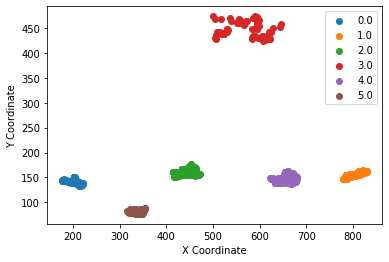

KeyboardInterrupt: ignored

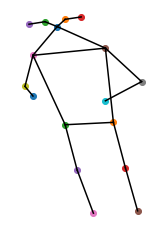

In [ ]:
key = np.load("/content/drive/MyDrive/vic_3/points/keypoint_6/point_3.npy",allow_pickle=True)
#point3 제외할것.
keypoint=key.item().get('keypoint')
nose=[]
kypt=[]
for j in range(0,int(keypoint.shape[0])):
    for f in range(0,int(keypoint.shape[1])):
        key_x_y = (keypoint[:,f][j])
        key_nose = key_x_y[0]

        # key_x_y_1 = (keypoint[:,f][j])



        if key_x_y.mean() == 0.0:
          continue
          #kypt.append(key_x_y)
        else :
          kypt.append(key_x_y)
          nose.append(key_nose)

coordinates=kmeans(nose,keypoint.shape[0])

grouped={}
for row in coordinates:
    x, y, label = row
    if label not in grouped:
        grouped[label] = []
    grouped[label].append([x, y])



# iterate over each label in grouped
for label in grouped:
    # extract x and y coordinates for the label
    label_coords = grouped[label]
    x_coords = [coord[0] for coord in label_coords]
    y_coords = [coord[1] for coord in label_coords]

    # create a scatter plot for the label
    plt.scatter(x_coords, y_coords, label=label)

# add axis labels and legend
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()

# show the plot
plt.show()



for i in range(0,keypoint.shape[0]):
  path = "/content/drive/MyDrive/RA/test_33332/{}".format(i)
  os.makedirs(path, exist_ok=True)
  os.chdir(path)
  for j in range(0,len(nose)):
    if list(kypt[j][0]) in grouped[i]:
      skeleton_plot(kypt[j])
      plt.axis('off')
      img_name = ("a.{}.jpg").format(j)
      plt.savefig(fname=img_name, bbox_inches='tight', pad_inches=0)
      plt.clf()






In [ ]:
key = np.load("/content/drive/MyDrive/vic_3/points/keypoint_6/point_3.npy",allow_pickle=True)

keypoint=key.item().get('keypoint')

nose=[]
kypt=[]



eyes_len = [] #눈
ears_len = [] #귀

nose_Reye_len=[] # 코-왼쪽 눈
nose_Leye_len=[] #
Reye_Rear_len= []
Leye_Lear_len = []



sh_len = []
nose_Lsh_len = []
nose_Rsh_len = []
Ls_Lh_len = []
Rs_Rh_len = []
Lh_Rh_len = []

Lh_Lk_len = []
Rh_Rk_len = []

Lk_La_len = []
Rk_Ra_len = []

Ls_Le_len = []
Le_Lw_len = []
Rs_Re_len = []
Re_Rw_len = []

for j in range(0,int(keypoint.shape[0])):
    for f in range(0,int(keypoint.shape[1])):
        key_x_y = (keypoint[:,f][j])
        key_nose = (key_x_y[12]+key_x_y[13])

        if key_x_y.mean() == 0.0:
          continue




        else:
          kypt.append(key_x_y)
          nose.append(key_nose)
          eyes_len.append((key_len_check(key_x_y[1],key_x_y[2])))
          ears_len.append((key_len_check(key_x_y[3],key_x_y[4])))

          sh_len.append((key_len_check(key_x_y[5],key_x_y[6])))
          nose_Lsh_len.append((key_len_check(key_x_y[0],key_x_y[5])))
          nose_Rsh_len.append((key_len_check(key_x_y[0],key_x_y[6])))
          Ls_Lh_len.append((key_len_check(key_x_y[5],key_x_y[11])))
          Rs_Rh_len.append((key_len_check(key_x_y[6],key_x_y[12])))
          Lk_La_len.append((key_len_check(key_x_y[13],key_x_y[15])))
          Rk_Ra_len.append((key_len_check(key_x_y[14],key_x_y[16])))

          Lh_Rh_len.append((key_len_check(key_x_y[11],key_x_y[12])))

          nose_Leye_len.append((key_len_check(key_x_y[0],key_x_y[1])))
          nose_Reye_len.append((key_len_check(key_x_y[0],key_x_y[2])))
          Leye_Lear_len.append((key_len_check(key_x_y[1],key_x_y[3])))
          Reye_Rear_len.append((key_len_check(key_x_y[2],key_x_y[4])))

          Lh_Lk_len.append((key_len_check(key_x_y[11],key_x_y[13])))
          Rh_Rk_len.append((key_len_check(key_x_y[12],key_x_y[14])))
          Ls_Le_len.append((key_len_check(key_x_y[5],key_x_y[7])))
          Le_Lw_len.append((key_len_check(key_x_y[7],key_x_y[9])))
          Rs_Re_len.append((key_len_check(key_x_y[6],key_x_y[8])))
          Re_Rw_len.append((key_len_check(key_x_y[8],key_x_y[10])))

eyes_len=np.array(eyes_len)
ears_len=np.array(ears_len)

sh_len=np.array(sh_len)
nose_Lsh_len=np.array(nose_Lsh_len)
nose_Rsh_len=np.array(nose_Rsh_len)
Ls_Lh_len = np.array(Ls_Lh_len)
Rs_Rh_len = np.array(Rs_Rh_len)
Lk_La_len = np.array(Lk_La_len)
Rk_Ra_len = np.array(Rk_Ra_len)

nose_Reye_len = np.array(nose_Reye_len)
nose_Leye_len = np.array(nose_Leye_len)
Reye_Rear_len = np.array(Reye_Rear_len)
Leye_Lear_len = np.array(Leye_Lear_len)

Lh_Rh_len = np.array(Lh_Rh_len)

Lh_Lk_len = np.array(Lh_Lk_len)
Rh_Rk_len = np.array(Rh_Rk_len)

Lk_La_len = np.array(Lk_La_len)
Rk_Ra_len = np.array(Rk_Ra_len)

Ls_Le_len = np.array(Ls_Le_len)
Le_Lw_len = np.array(Le_Lw_len)
Rs_Re_len = np.array(Rs_Re_len)
Re_Rw_len = np.array(Re_Rw_len)


eyes_outlier = detect_outliers(eyes_len)
ears_outlier = detect_outliers(ears_len)
sh_outlier = detect_outliers(sh_len)
nose_Lsh_outlier = detect_outliers(nose_Lsh_len)
nose_Rsh_outlier = detect_outliers(nose_Rsh_len)
Ls_Lh_outlier = detect_outliers(Ls_Lh_len)
Rs_Rh_outlier = detect_outliers(Rs_Rh_len)
Lk_La_outlier = detect_outliers(Lk_La_len)
Rk_Ra_outlier = detect_outliers(Rk_Ra_len)
nose_Reye_outlier= detect_outliers(nose_Reye_len)
nose_Leye_outlier= detect_outliers(nose_Leye_len)
Reye_Rear_outlier= detect_outliers(Reye_Rear_len)
Leye_Lear_outlier= detect_outliers(Leye_Lear_len)
Lh_Lk_outlier= detect_outliers(Lh_Lk_len)
Rh_Rk_outlier= detect_outliers(Rh_Rk_len)
Lh_Rh_outlier = detect_outliers(Lh_Rh_len)
Ls_Le_outlier= detect_outliers(Ls_Le_len)
Le_Lw_outlier= detect_outliers(Le_Lw_len)
Rs_Re_outlier= detect_outliers(Rs_Re_len)
Re_Rw_outlier= detect_outliers(Re_Rw_len)


coordinates= kmeans(nose,keypoint.shape[0])

grouped={}
for row in coordinates:
    x, y, label = row
    if label not in grouped:
        grouped[label] = []
    grouped[label].append([x, y])



for i in range(0,keypoint.shape[0]):
  path = "/content/drive/MyDrive/RA/word_hip2/{}".format(i)
  os.makedirs(path, exist_ok=True)
  os.chdir(path)

  eyes_len = [] #눈
  ears_len = [] #귀

  nose_Reye_len=[]  # 코-눈
  nose_Leye_len=[]
  Reye_Rear_len= [] # 눈-귀
  Leye_Lear_len = []



  sh_len = [] # 어깨
  nose_Lsh_len = [] # 코 어꺠
  nose_Rsh_len = []

  Ls_Lh_len = [] # 어깨 -엉덩이
  Rs_Rh_len = []

  Lh_Rh_len = [] # 엉덩이

  Lh_Lk_len = [] # 엉덩이-무릎
  Rh_Rk_len = []

  Lk_La_len = [] #  무릎 - 발목목
  Rk_Ra_len = []

  Ls_Le_len = [] # 어깨-팔꿈치, 팔꿈치- 손목목
  Le_Lw_len = []
  Rs_Re_len = []
  Re_Rw_len = []




  for w in range(0,len(nose)):
      # if is_triangle(kypt[w][5],kypt[w][6],kypt[w][0])==False:
      #       continue
      #       #kypt.append(key_x_y)
      # elif  (triangle_area(kypt[w][5],kypt[w][6],kypt[w][0]) > rectangle_area(kypt[w][5],kypt[w][6],kypt[w][11],kypt[w][12])):
      #       continue
      #       #ypt.append(key_x_y)
      #       #print(key_x_y[5],key_x_y[6],key_x_y[0],key_x_y[11],key_x_y[12]," ",key_x_y[6],key_x_y[5]," ",triangle_area(key_x_y[5],key_x_y[6],key_x_y[0]),rectangle_area(key_x_y[11],key_x_y[12],key_x_y[6],key_x_y[5]))
      # elif len_check(kypt[w][0],kypt[w][1],kypt[w][2],kypt[w][3],kypt[w][4],kypt[w][11],kypt[w][12],kypt[w][13],kypt[w][14],kypt[w][15],kypt[w][16],kypt[w][5],kypt[w][6],kypt[w][7],kypt[w][8],kypt[w][9],kypt[w][10]) == False:
      #       continue
      # elif (key_len_check(kypt[w][1],kypt[w][2]))in eyes_outlier:
      #   continue

      # elif (key_len_check(kypt[w][3],kypt[w][4]))in ears_outlier:
      #   continue

      # elif (key_len_check(kypt[w][5],kypt[w][6]))in sh_outlier:
      #   continue
      #   # c.append(kypt[i])
      # elif (key_len_check(kypt[w][0],kypt[w][5]))in nose_Lsh_outlier:
      #   continue
      #   #c.append(kypt[i])
      # elif (key_len_check(kypt[w][0],kypt[w][6]))in nose_Rsh_outlier:
      #     continue
      #   #c.append(kypt[i])
      # elif (key_len_check(kypt[w][5],kypt[w][11]))in Ls_Lh_outlier:
      #   continue
      #   #c.append(kypt[i])
      # elif  (key_len_check(kypt[w][6],kypt[w][12]))in Rk_Ra_outlier:
      #   continue
      #   # c.append(kypt[i])
      # elif  (key_len_check(kypt[w][13],kypt[w][15]))in Lk_La_outlier:
      #   continue
      #   #c.append(kypt[i])
      # elif  (key_len_check(kypt[w][14],kypt[w][16]))in Rk_Ra_outlier:
      #   continue
      #   #c.append(kypt[i])
      # elif  (key_len_check(kypt[w][0],kypt[w][1]))in nose_Reye_outlier:
      #   continue
      #   # c.append(kypt[i])
      # elif  (key_len_check(kypt[w][0],kypt[w][2]))in nose_Leye_outlier:
      #   continue
      #   # c.append(kypt[i])
      # elif  (key_len_check(kypt[w][1],kypt[w][3]))in Reye_Rear_outlier:
      #   continue
      #   #c.append(kypt[i])
      # elif  (key_len_check(kypt[w][2],kypt[w][4]))in Leye_Lear_outlier:
      #   continue
      #   # c.append(kypt[i])
      # elif  (key_len_check(kypt[w][11],kypt[w][12]))in Lh_Rh_outlier:
      #     continue
      #   #c.append(kypt[i])
      # elif  (key_len_check(kypt[w][11],kypt[w][13]))in Lh_Lk_outlier:
      #     continue
      #   #c.append(kypt[i])
      # elif  (key_len_check(kypt[w][12],kypt[w][14]))in Rh_Rk_outlier:
      #     continue
      #   #c.append(kypt[i])
      # elif  (key_len_check(kypt[w][5],kypt[w][7]))in Ls_Le_outlier:
      #     continue
      #     #c.append(kypt[i])
      # elif  (key_len_check(kypt[w][7],kypt[w][9]))in Le_Lw_outlier:
      #     continue
      #     #c.append(kypt[i])
      # elif  (key_len_check(kypt[w][6],kypt[w][8]))in Rs_Re_outlier:
      #     continue
      #   #c.append(kypt[i])
      # elif  (key_len _check(kypt[w][8],kypt[w][10]))in Re_Rw_outlier:
      #     continue
      #   #c.append(kypt[i])

        print(list(kypt[w][0]) in grouped[i])
        if list(kypt[w][0]) in grouped[i]:
          skeleton_plot(kypt[w])
          plt.axis('off')
          img_name = ("a.{}.jpg").format(w)
          print(img_name)
          plt.savefig(fname=img_name, bbox_inches='tight', pad_inches=0)
          plt.clf()






In [ ]:
file_path ="/content/drive/MyDrive/RA/img_33"
files=os.listdir(file_path)

e=[]
for i in files:
  image=Image.open(os.path.join(file_path,i)).resize([120,120])
  e.append(image)



save_path = "/content/drive/MyDrive/RA/vic/gifs/person_16"
os.makedirs(save_path,exist_ok=True)
os.chdir(save_path)

# for t in range(0,len(e)):
#   gif_name = 'animation.{}.gif'.format(t)
#   e[t][0].save(gif_name, save_all=True, append_images=e[t][1:])

gif_name = 'animation.good2.gif'

e[0].save(gif_name, save_all=True, append_images=e[1:])




In [ ]:
import os
base_path = "/content/drive/MyDrive/RA/test_5"
file_path = base_path
files = os.listdir(file_path)


for w in files:
    lists=os.listdir(os.path.join(file_path,w))
    folder_list=os.path.join(file_path,w)
    index_dir=index_files_in_folder(folder_list)


    print(os.path.join(file_path,w))
    if len(lists)%40 != 0 : # windowsize를 5로 설정했기 때문에 폴더 내 이미지 파일 개수가 5의 배수가 아닐 경우 이를 맞춰준다.
      for q in range(0,(len(lists))%40):
        os.remove(os.path.join(file_path,w,index_dir[q]))

# 모든 gif data들 행동별로 저장


In [ ]:
import os
import shutil
import datetime
from PIL import Image, ImageSequence
gif_folder = "/content/drive/MyDrive/gifs"
file_list=os.listdir(gif_folder)



for i in file_list :

  action_list= os.path.join(gif_folder, i)
  action_label = os.listdir(action_list)



  for file_name in action_label:
     #os.chdir()

      action_list_ = os.path.join(gif_folder, i,file_name)


      folder_list= os.listdir(action_list_)

      #print(folder_list)


      for file_name_ in folder_list:

        file_path = os.path.join(action_list,file_name,file_name_)


        basename = os.path.basename(file_name_)

        now = datetime.datetime.now()
        timestamp = now.strftime('%Y-%m-%d %H:%M:%S.%f')

  #       image = Image.open(file_path)

  # # Get the number of frames
  #       frame_count = 0
  #       for frame in ImageSequence.Iterator(image):
  #           frame_count += 1

  #       print("The number of frames in the image is {}".format(frame_count))
        if basename.startswith("animation.0."):
            print(file_path)
            shutil.copy(file_path, "/content/drive/MyDrive/action_extract/action_0/animation.0."+ timestamp+".gif")
        if basename.startswith("animation.1."):
            print(file_path)
            shutil.copy(file_path, "/content/drive/MyDrive/action_extract/action_1/animation.1."+ timestamp+".gif")
        if basename.startswith("animation.2."):
            print(file_path)
            shutil.copy(file_path, "/content/drive/MyDrive/action_extract/action_2/animation.2."+ timestamp+".gif")
        if basename.startswith("animation.3."):
            print(file_path)
            shutil.copy(file_path, "/content/drive/MyDrive/action_extract/action_3/animation.3."+ timestamp+".gif")
        if basename.startswith("animation.4."):
            print(file_path)
            shutil.copy(file_path, "/content/drive/MyDrive/action_extract/action_4/animation.4."+ timestamp+".gif")
        if basename.startswith("animation.5."):
            print(file_path)
            shutil.copy(file_path, "/content/drive/MyDrive/action_extract/action_5/animation.5."+ timestamp+".gif")
        if basename.startswith("animation.6."):
            print(file_path)
            shutil.copy(file_path, "/content/drive/MyDrive/action_extract/action_6/animation.6."+ timestamp+".gif")
        if basename.startswith("animation.7."):
            print(file_path)
            shutil.copy(file_path, "/content/drive/MyDrive/action_extract/action_7/animation.7."+ timestamp+".gif")
        if basename.startswith("animation.8."):
            print(file_path)
            shutil.copy(file_path, "/content/drive/MyDrive/action_extract/action_8/animation.8."+ timestamp+".gif")
        if basename.startswith("animation.9."):
             print(file_path)
             shutil.copy(file_path, "/content/drive/MyDrive/action_extract/action_9/animation.9."+ timestamp+".gif")
        if basename.startswith("animation.10."):
            print(file_path)
            shutil.copy(file_path, "/content/drive/MyDrive/action_extract/action_10/animation.10."+ timestamp+".gif")
        if basename.startswith("animation.11."):
            print(file_path)
            shutil.copy(file_path, "/content/drive/MyDrive/action_extract/action_11/animation.11."+ timestamp+".gif")
        if basename.startswith("animation.12."):
            print(file_path)
            shutil.copy(file_path, "/content/drive/MyDrive/action_extract/action_12/animation.12."+ timestamp+".gif")





/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.4.gif
/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.5.gif
/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.6.gif
/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.7.gif
/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.8.gif
/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.9.gif
/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.10.gif
/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.11.gif
/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.12.gif
/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.13.gif
/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.14.gif
/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.15.gif
/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.16.gif
/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.17.gif
/content/drive/MyDrive/gifs/keypoint_1/action_0/animation.0.18.gif
/

In [ ]:
from PIL import Image, ImageSequence




for i in range(0,13):

    files='/content/drive/MyDrive/action_extract/action_{}'.format(i)
    dirListing = os.listdir(files)


    for j in dirListing:
        action_list= os.path.join(files, j)

        image = Image.open(action_list)

  # Get the number of frames
        frame_count = 0
        for frame in ImageSequence.Iterator(image):
            frame_count += 1

        print("{} : The number of frames in the image is {}".format(j,frame_count))
        if frame_count<40:
          os.remove(action_list)
          print("del_complete")


animation.0.2023-02-20 02:37:18.980483.gif : The number of frames in the image is 40
animation.0.2023-02-20 02:37:19.002028.gif : The number of frames in the image is 40
animation.0.2023-02-20 02:37:19.016991.gif : The number of frames in the image is 40
animation.0.2023-02-20 02:37:19.032590.gif : The number of frames in the image is 40
animation.0.2023-02-20 02:37:19.045962.gif : The number of frames in the image is 40
animation.0.2023-02-20 02:37:19.065645.gif : The number of frames in the image is 40
animation.0.2023-02-20 02:37:19.078336.gif : The number of frames in the image is 40
animation.0.2023-02-20 02:37:19.089053.gif : The number of frames in the image is 39
del_complete
animation.0.2023-02-20 02:37:19.099621.gif : The number of frames in the image is 40
animation.0.2023-02-20 02:37:19.111705.gif : The number of frames in the image is 40
animation.0.2023-02-20 02:37:19.123073.gif : The number of frames in the image is 40
animation.0.2023-02-20 02:37:19.135392.gif : The num

In [ ]:
for i in range(0,10):
    path = "/content/drive/MyDrive/RA/test_3/dataset/test/action_{}".format(i)
    dirListing = os.listdir(path)


    for j in dirListing:
        action_list= os.path.join(path, j)

        image = Image.open(action_list)

  # Get the number of frames
        frame_count = 0
        for frame in ImageSequence.Iterator(image):
            frame_count += 1

        print("{} : The number of frames in the image is {}".format(j,frame_count))



animation.0.2023-02-05 23:23:52.895178.gif : The number of frames in the image is 20
animation.0.2023-02-05 23:29:47.878714.gif : The number of frames in the image is 20
animation.0.2023-02-05 23:12:43.827893.gif : The number of frames in the image is 20
animation.0.2023-02-05 23:31:43.954011.gif : The number of frames in the image is 20
animation.0.2023-02-05 23:26:09.307176.gif : The number of frames in the image is 20
animation.0.2023-02-05 23:23:56.791708.gif : The number of frames in the image is 20
animation.0.2023-02-05 23:27:47.635882.gif : The number of frames in the image is 20
animation.0.2023-02-05 23:27:55.728313.gif : The number of frames in the image is 20
animation.0.2023-02-05 23:12:56.012492.gif : The number of frames in the image is 20
animation.0.2023-02-05 23:26:09.523951.gif : The number of frames in the image is 20
animation.0.2023-02-05 23:26:10.737737.gif : The number of frames in the image is 19
animation.0.2023-02-05 23:12:50.690143.gif : The number of frames

In [ ]:
def get_files_count(folder_path):
	dirListing = os.listdir(folder_path)

	return len(dirListing)

w=[]
for i in range(0,13):
    path = "/content/drive/MyDrive/action_extract/action_{}".format(i)
    dirListing = os.listdir(path)
    a = "action_{} : ".format(i)
    print(a ,len(dirListing))

sorting(w)[0]

action_0 :  292
action_1 :  267
action_2 :  233
action_3 :  279
action_4 :  301
action_5 :  316
action_6 :  423
action_7 :  303
action_8 :  250
action_9 :  319
action_10 :  229
action_11 :  174
action_12 :  286


NameError: ignored

In [ ]:
import os

In [ ]:
def get_files_count(folder_path):
	dirListing = os.listdir(folder_path)

	return len(dirListing)

get_files_count("/content/drive/MyDrive/RA/test_15/2")

61

In [ ]:

for i in range(0,13):
    path = "/content/drive/MyDrive/action_1/action_{}".format(i)
    dirListing = os.listdir(path)
    a = "action_{} : ".format(i)
    print(a ,len(dirListing))

action_0 :  277
action_1 :  237
action_2 :  193
action_3 :  229
action_4 :  259
action_5 :  274
action_6 :  389
action_7 :  295
action_8 :  218
action_9 :  288
action_10 :  210
action_11 :  162
action_12 :  229


Train Val Test set 만들기

In [ ]:
!pip install split-folders

%cd /content/drive/MyDrive/
import splitfolders
splitfolders.fixed("/content/drive/MyDrive/action_1", output="dataset_last_4", seed=1337, fixed=(int(162*0.6),int(162*0.2),int(162*0.2)))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/drive/MyDrive



Copying files: 0 files [00:00, ? files/s]
Copying files: 4 files [00:00, 37.98 files/s]
Copying files: 10 files [00:00, 47.90 files/s]
Copying files: 18 files [00:00, 61.18 files/s]
Copying files: 25 files [00:00, 61.20 files/s]
Copying files: 32 files [00:00, 63.49 files/s]
Copying files: 40 files [00:00, 68.06 files/s]
Copying files: 47 files [00:00, 63.14 files/s]
Copying files: 57 files [00:00, 71.36 files/s]
Copying files: 65 files [00:00, 71.95 files/s]
Copying files: 74 files [00:01, 76.71 files/s]
Copying files: 82 files [00:01, 72.61 files/s]
Copying files: 91 files [00:01, 76.20 files/s]
Copying files: 99 files [00:01, 73.24 files/s]
Copying files: 109 files [00:01, 79.47 files/s]
Copying files: 118 files [00:01, 78.37 files/s]
Copying files: 128 files [00:01, 83.47 files/s]
Copying files: 137 files [00:01, 76.66 files/s]
Copying files: 146 files [00:02, 74.73 files/s]
Copying files: 154 files [00:02, 73.11 files/s]
Copying files: 162 files [00:02, 64.21 files/s]
Copying fil

#  heatmap 이미지 생성해보기

In [ ]:
data_path='/content/drive/MyDrive/RA/vic_3/points/keypoint_6/point_2.npy'
id_path='/content/drive/MyDrive/RA/vic_3/points/track_id_6/id_2.npy'
data=np.load(data_path, allow_pickle=True)


key = data[197][0]['keypoints'][:,:2]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter

# Define the image size
img_width, img_height = 640, 480

# Create an empty heatmap
heatmap = np.zeros((img_height, img_width))

# Define the coordinates of the keypoints
keypoints = key

# Set the value of 1 at each keypoint location using a Gaussian distribution
sigma = 10  # controls the spread of the Gaussian
for x, y in keypoints:
    heatmap[max(0, y-sigma):min(img_height, y+sigma+1),
            max(0, x-sigma):min(img_width, x+sigma+1)] += \
        gaussian_filter(np.ones((2*sigma+1, 2*sigma+1)), sigma)

# Normalize the heatmap values between 0 and 1
heatmap /= np.max(heatmap)

# Display the heatmap
plt.imshow(heatmap, cmap='jet', interpolation='nearest')
plt.show()

In [ ]:
import numpy as np

def generate_heatmap(keypoint, heatmap_shape, sigma=1.0, confidence=1.0):
    # Create 2D grid of indices for the heatmap
    xs, ys = np.meshgrid(np.arange(heatmap_shape[1]), np.arange(heatmap_shape[0]))
    print

    # Calculate Gaussian function at each index
    heatmap = np.exp(-((xs - keypoint[1])**2 + (ys - keypoint[0])**2) / (2 * sigma**2)) * confidence

    return heatmap

In [ ]:
import numpy as np

class MinMaxScaler:
    def __init__(self, feature_range=(0, 1)):
        self.feature_range = feature_range

    def fit(self, X):
        self.min_ = np.min(X, axis=0)
        self.max_ = np.max(X, axis=0)
        return self

    def transform(self, X):
        X_scaled = (X - self.min_) / (self.max_ - self.min_)
        X_scaled = X_scaled * (self.feature_range[1] - self.feature_range[0]) + self.feature_range[0]
        return X_scaled

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [ ]:
scaler = MinMaxScaler(feature_range=(0.2, 1))
X_scaled = scaler.fit_transform(key)

In [ ]:
!pip install cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv

ImportError: ignored

In [ ]:
class MinMaxScaler:
    def __init__(self, feature_range=(0, 1)):
        self.feature_range = feature_range

    def fit(self, X):
        self.min_ = np.min(X, axis=0)
        self.max_ = np.max(X, axis=0)
        return self

    def transform(self, X):
        X_scaled = (X - self.min_) / (self.max_ - self.min_)
        X_scaled = X_scaled * (self.feature_range[1] - self.feature_range[0]) + self.feature_range[0]
        return X_scaled

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

def generate_heatmap(keypoint, heatmap_shape, sigma=1.0, confidence=1.0):
    # Create 2D grid of indices for the heatmap
    xs, ys = np.meshgrid(np.arange(heatmap_shape[0]), np.arange(heatmap_shape[1]))

    # Calculate Gaussian function at each index
    heatmap = np.exp(-((xs - keypoint[0])**2 + (ys - keypoint[1])**2) / (2 * sigma**2)) * confidence

    return heatmap


def generate_heatmap_L(keypoint, heatmap_shape, segment, sigma=1.0, confidence=1.0):
    # Create 2D grid of indices for the heatmap
    xs, ys = np.meshgrid(np.arange(heatmap_shape[0]), np.arange(heatmap_shape[1]))

    # Calculate the Euclidean distance between each pixel and the segment
    D = np.abs((ys - segment[0][1])*(segment[1][0] - segment[0][0])
               - (xs - segment[0][0])*(segment[1][1] - segment[0][1])) \
        / np.sqrt((segment[1][0] - segment[0][0])**2 + (segment[1][1] - segment[0][1])**2)

    # Calculate the weight for each pixel using the Gaussian kernel function
    weight = np.exp(-D**2 / (2 * sigma**2)) * confidence

    return weight

def make_heatmap(X_scaled):
# Define image size and number of keypoints
    img_size = (250, 250)
    num_keypoints = 17

    limb_heatmap = np.zeros(img_size, dtype=np.float32)
    segment = [[25, 25], [75, 75]]

    # Generate random keypoints
    keypoints = X_scaled * 200
    print(keypoints)
    # Define skeleton connections
    skeleton = [[15, 13], [13, 11], [16, 14], [14, 12], [11, 12],
                [5, 11], [6, 12], [5, 6], [5, 7], [6, 8], [7, 9],
                [8, 10], [1, 2], [0, 1], [0, 2], [1, 3], [2, 4],
                [3, 5], [4, 6]]

    # Create empty heatmap
    heatmap = np.zeros(img_size, dtype=np.float32)

    # Loop over keypoints and generate heatmaps
    for i in range(num_keypoints):
      kp_heatmap = generate_heatmap(keypoints[i], img_size, sigma=3.0, confidence=1.0)
      heatmap += kp_heatmap
      heatmap /= np.max(heatmap)

    heatmap_vis = cv2.applyColorMap(np.uint8(heatmap * 255), cv2.COLORMAP_JET)

    for i, conn in enumerate(skeleton):
      pt1 = keypoints[conn[0]].astype(int)
      pt2 = keypoints[conn[1]].astype(int)
      if heatmap[pt1[1], pt1[0]] > 0.1 and heatmap[pt2[1], pt2[0]] > 0.1:
        cv2.line(heatmap_vis, tuple(pt1), tuple(pt2), (255, 255, 255), thickness=2, lineType=cv2.LINE_AA)
    cv2.imwrite("/content/drive/MyDrive/RA/ㄴㄴHeatmap4ㄴㅇㅇ44.jpg", heatmap_vis)
    cv2.waitKey(0)
    cv2.destroyAllWindows()




In [ ]:
import numpy as np

# Define the parameters
keypoint = [50, 50]  # x, y coordinates of the keypoint
heatmap_shape = [100, 100]  # width, height of the heatmap
segment = [[25, 25], [75, 75]]  # start and end points of the segment
sigma = 1.0  # width of the Gaussian kernel
confidence = 1.0  # confidence score for the keypoint

# Call the function to generate the heatmap
heatmap = generate_heatmap(keypoint, heatmap_shape, sigma, confidence)

# Print the result
print(heatmap)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


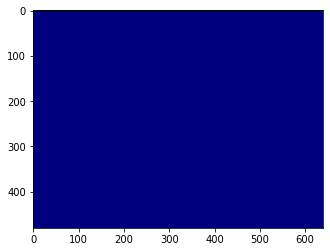

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the image size
img_width, img_height = 640, 480

# Create an empty heatmap
heatmap = np.zeros((img_height, img_width))

# Define the coordinates of the keypoints
keypoints = [(10, 20), (50, 100), (200, 300), (400, 200), (600, 100),
             (300, 400), (320, 420), (340, 440), (360, 460), (200, 150),
             (220, 170), (240, 190), (260, 210), (280, 230), (300, 250),
             (280, 150)]

# Set the heatmap value at the keypoints locations to 1
for x, y in keypoints:
    heatmap[y, x] = 1

# Display the heatmap
plt.imshow(heatmap, cmap='jet', interpolation='nearest')
plt.show()

In [ ]:
import cv2
import numpy as np

# Assuming heatmap_tensor has shape [1, K, H, W]
heatmap = heatmap_tensor[0, 0]  # Extract the first heatmap channel

# Normalize the heatmap values to [0, 1]
heatmap_norm = cv2.normalize(heatmap, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Apply the "jet" color map
heatmap_rgb = cv2.applyColorMap(np.uint8(heatmap_norm * 255), cv2.COLORMAP_JET)

# Save the heatmap image to disk
cv2.imwrite('heatmap.jpg', heatmap_rgb)

NameError: ignored

In [ ]:
from sklearn.cluster import AgglomerativeClustering

def ward_hc(nose, n_clusters):
    # Load the coordinate data
    coordinates = np.array(nose)

    # Initialize the Ward hierarchical clustering algorithm
    ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

    # Fit the model to the data
    ward.fit(coordinates)

    # Get the cluster assignments for each data point
    cluster_assignments = ward.labels_

    # Print the cluster assignments
    print("Cluster assignments:", cluster_assignments)

    # Add the cluster assignments as a new column in the coordinates array
    coordinates = np.column_stack((coordinates, cluster_assignments))

    # Sort the coordinates array based on the cluster assignments
    sorted_indices = np.argsort(coordinates[:, 2])
    coordinates = coordinates[sorted_indices]

    # Print the reordered coordinates
    return coordinates